# Internet access in countries whose Portuguese is the official language
Usually my data analysis notebook are in Python making use of libraries such as NumPy and Pandas. Motivated by my undergoing Udacity Nanodegree, I discovery that performing exploratory data analysis in R can be both easier and more presentable. It does not mean I will stop using Python in my work, quite the opposite. However, R is rather an important tool that can be used primarily for more refined EDA and visualization tasks.  

To illustrate it, in this notebook I will use data available from [GapMinder](https://www.gapminder.org/data/) to perform a simplified exploratory data analysis. I'm pretty sure that many things I present here could be done in a different manner. I'd appreciate if those experienced in R could help me given comment on how I could improve this notebook.

## Reading the data
Since I'm interested in Telecommunications, I choose to use three datasets available on GapMinder and provided by World Bank: (i) Internet users (total); (ii) Cell phones (total); and (iii) Broadband subscribers (total). I choose all data from the same provider since I intend to compare data among them. **It's extremely important though to check if data are compatible, how and when they were measured in order to affirm anything.** However, considering this notebook is just an exercise, I will assume as a premise that all data were collected with the same technical rigor and with the same population parameters.

In [58]:
gm_broad <- read.csv('broadband_total.csv', header = T, row.names = 1, check.names = F)
gm_cell <- read.csv('cellphone_total.csv',, header = T, row.names = 1, check.names = F)
gm_internet <- read.csv('Internet_user_total.csv', header = T, row.names = 1, check.names = F)

In [59]:
## Showing up the first lines of the dataset:
head(gm_broad)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Afghanistan,NA,NA,NA,NA,NA,NA,0,0,0,200,220,500,500,500,1000,1500,NA
Albania,NA,NA,NA,NA,NA,NA,0,0,0,0,272,NA,10000,64000,92000,105519,NA
Algeria,NA,NA,NA,NA,NA,NA,0,0,18000,36000,135000,170000,287039,485000,818000,900000,NA
American Samoa,NA,NA,NA,NA,NA,NA,0,0,,NA,NA,NA,NA,NA,NA,NA,NA
Andorra,NA,NA,NA,NA,NA,NA,NA,1148,3601,6282,10341,14616,18526,20672,22941,24502,NA
Angola,NA,NA,NA,NA,NA,NA,0,0,0,0,0,7458,11700,15942,20000,20000,NA


In [60]:
## Analyzing the first dataset labels:
labels(gm_broad)

[[1]]
  [1] "Afghanistan"                      "Albania"                         
  [3] "Algeria"                          "American Samoa"                  
  [5] "Andorra"                          "Angola"                          
  [7] "Antigua and Barbuda"              "Argentina"                       
  [9] "Armenia"                          "Aruba"                           
 [11] "Australia"                        "Austria"                         
 [13] "Azerbaijan"                       "Bahamas"                         
 [15] "Bahrain"                          "Bangladesh"                      
 [17] "Barbados"                         "Belarus"                         
 [19] "Belgium"                          "Belize"                          
 [21] "Benin"                            "Bermuda"                         
 [23] "Bhutan"                           "Bolivia"                         
 [25] "Bosnia and Herzegovina"           "Botswana"                        
 [27] "Brazil"                           "Brunei"                          
 [29] "Bulgaria"                         "Burkina Faso"                    
 [31] "Burundi"                          "Cambodia"                        
 [33] "Cameroon"                         "Canada"                          
 [35] "Cape Verde"                       "Cayman Islands"                  
 [37] "Central African Rep."             "Chad"                            
 [39] "Channel Islands"                  "Chile"                           
 [41] "China"                            "Colombia"                        
 [43] "Comoros"                          "Congo, Dem. Rep."                
 [45] "Congo, Rep."                      "Costa Rica"                      
 [47] "Cote d'Ivoire"                    "Croatia"                         
 [49] "Cuba"                             "Cyprus"                          
 [51] "Czech Rep."                       "Denmark"                         
 [53] "Djibouti"                         "Dominica"                        
 [55] "Dominican Rep."                   "Ecuador"                         
 [57] "Egypt"                            "El Salvador"                     
 [59] "Equatorial Guinea"                "Eritrea"                         
 [61] "Estonia"                          "Ethiopia"                        
 [63] "Faeroe Islands"                   "Fiji"                            
 [65] "Finland"                          "France"                          
 [67] "French Polynesia"                 "Gabon"                           
 [69] "Gambia"                           "Georgia"                         
 [71] "Germany"                          "Ghana"                           
 [73] "Gibraltar"                        "Greece"                          
 [75] "Greenland"                        "Grenada"                         
 [77] "Guam"                             "Guatemala"                       
 [79] "Guinea"                           "Guinea-Bissau"                   
 [81] "Guyana"                           "Haiti"                           
 [83] "Honduras"                         "Hong Kong, China"                
 [85] "Hungary"                          "Iceland"                         
 [87] "India"                            "Indonesia"                       
 [89] "Iran"                             "Iraq"                            
 [91] "Ireland"                          "Isle of Man"                     
 [93] "Israel"                           "Italy"                           
 [95] "Jamaica"                          "Japan"                           
 [97] "Jordan"                           "Kazakhstan"                      
 [99] "Kenya"                            "Kiribati"                        
[101] "Korea, Dem. Rep."                 "Korea, Rep."                     
[103] "Kosovo"                           "Kuwait"                          
[105] "Kyrgyzstan"                       "

## Selecting data
For the purpose of this analysis we will set the following premises:
* Only the period from 2001 to 2010 will be considered;
* In order to simplify and to allow some comparison, it will be considered only [countries whose official language is Portuguese](https://en.wikipedia.org/wiki/List_of_territorial_entities_where_Portuguese_is_an_official_language)

In [61]:
## Defining the premises:
years <- as.character(c(2001:2010))
countries <- c('Brazil','Angola','Mozambique','Portugal',
               'Guinea-Bissau','Timor-Leste','Equatorial Guinea',
               'Macao, China','Cape Verde','Sao Tome and Principe')

In [62]:
## Importing library for data transformation:
library(dplyr)

In [63]:
## Moving the labels (or row_names) to a column for each dataset:
gm_broad$country <- rownames(gm_broad)
gm_cell$country <- rownames(gm_cell)
gm_internet$country <- rownames(gm_internet)

In [64]:
## Selecting years (columns):
gm_broad <- select(gm_broad, c(years,'country'))
gm_cell <- select(gm_cell, c(years,'country'))
gm_internet <- select(gm_internet, c(years,'country'))

In [65]:
## Filtering the desired countries (rows):
gm_broad <- filter(gm_broad, country %in% countries)
gm_cell <- filter(gm_cell, country %in% countries)
gm_internet <- filter(gm_internet, country %in% countries)

In [66]:
## Setting back the country as the row name:
rownames(gm_broad) <- gm_broad[,11]
rownames(gm_cell) <- gm_cell[,11]
rownames(gm_internet) <- gm_internet[,11]

In [67]:
## Removing the last column (country):
gm_broad[,11] <- NULL
gm_cell[,11] <- NULL
gm_internet[,11] <- NULL

In [68]:
gm_broad

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Angola,0,0,0,0,0,7458,11700,15942,20000,20000
Brazil,331000,731000,966252,3157466,3233800,4767007,7609452,9679974,11295531,13266310
Cape Verde,0,0,0,283,937,7475,7305,8107,11956,15971
Equatorial Guinea,0,0,0,0,180,180,180,180,180,1186
Guinea-Bissau,0,0,0,0,0,0,0,0,NA,NA
"Macao, China",9788,16954,27774,45218,68030,92217,110498,121569,126142,131372
Mozambique,0,0,0,0,0,NA,5743,10191,12502,14633
Portugal,99316,260591,502030,838371,1165440,1423687,1512394,1613725,1841556,2052930
Sao Tome and Principe,0,0,0,0,0,125,308,NA,NA,582
Timor-Leste,0,0,9,13,22,29,50,71,471,500


## Cleaning data
In this analysis, the missing data will be handled by replacing them with zero.

In [69]:
## Replacing the NA values by zero
gm_broad <- gm_broad %>% replace(is.na(.),0)
gm_cell <- gm_cell %>% replace(is.na(.),0)
gm_internet <- gm_internet %>% replace(is.na(.),0)

In [70]:
## Transposing the rows and columns:
tp_broad <- t(gm_broad)
tp_cell <- t(gm_cell)
tp_internet <- t(gm_internet)

## Analyzing data
Considering the available data and the premises stipulated previously, our analysis will be conducted by the following questions:
1. We have data about (i) broadband access; (ii) cell phone users; and (iii) Internet accesses. The first hypothesis is that the number of Internet accesses is higher than the other measurements, since both broadband and cell phone can provide it. However, it is not expected to be equal to the sum of them, since other technologies can be used (e.g. dial-up access). In short, how does Internet access evolve over time?

2. Has the increase in the number of Internet accesses over the years occurred under the same rate in all countries?

## (1) Internet access over time
In order to get to this information, first we will calculate the total by year for each dataset available.

#### Calculating total information for broadband data:

In [71]:
## Including a TOTAL row for broadband data:
gm_broad["Total" ,] <- colSums(gm_broad)

ERROR: Error in colSums(gm_broad): 'x' deve ser numérico


The error message above tells us there is no numeric data in the considered dataframe. The next code lines attempts to find its causes and to solve it.

In [72]:
## Checking the dataframe structure:
str(gm_broad)

'data.frame':	10 obs. of  10 variables:
 $ 2001: int  0 331000 0 0 0 9788 0 99316 0 0
 $ 2002: int  0 731000 0 0 0 16954 0 260591 0 0
 $ 2003: Factor w/ 126 levels "","0","10","1000",..: 2 124 2 2 2 63 2 91 2 116
 $ 2004: int  0 3157466 283 0 0 45218 0 838371 0 13
 $ 2005: int  0 3233800 937 180 0 68030 0 1165440 0 22
 $ 2006: num  7458 4767007 7475 180 0 ...
 $ 2007: int  11700 7609452 7305 180 0 110498 5743 1512394 308 50
 $ 2008: num  15942 9679974 8107 180 0 ...
 $ 2009: num  20000 11295531 11956 180 0 ...
 $ 2010: num  20000 13266310 15971 1186 0 ...


*int* and *double* are both numerical types. However, it's clear to notice that the column named "2003" has a Factor type, which means its segmented in different levels:

In [73]:
## Checking the "2003" column levels:
levels(gm_broad$"2003")

[1] ""           "0"          "10"         "1000"       "10033"     
  [6] "10476"      "10941"      "1095000"    "110402"     "11173663"  
 [11] "11219010"   "1146"       "116997"     "1184"       "119"       
 [16] "123"        "1242928"    "1267966"    "13000"      "136"       
 [21] "139"        "1399"       "1400"       "140362"     "1410"      
 [26] "145"        "14878"      "14917165"   "15"         "1500"      
 [31] "15000"      "15039"      "15351"      "1668"       "170"       
 [36] "18000"      "18700"      "19533"      "195752"     "19601"     
 [41] "196106"     "1988000"    "199324"     "2000"       "20313"     
 [46] "21"         "2121930"    "216"        "22"         "22461"     
 [51] "2250000"    "22736"      "2383"       "25"         "258849"    
 [56] "259"        "264311"     "2651"       "2712"       "27319"     
 [61] "2757"       "27744342"   "27774"      "2991"       "30327"     
 [66] "3113702,33" "3400"       "3417"       "343000"     "34690"     
 [71] "352234"     "3569381"    "3601"       "3838"       "394"       
 [76] "398758"     "413"        "41571"      "417100"     "41800"     
 [81] "419"        "428371"     "4403"       "4470000"    "45000"     
 [86] "4513000"    "45982"      "491100"     "4996"       "500"       
 [91] "502030"     "503"        "516800"     "54337"      "54850"     
 [96] "55000"      "57"         "5740"       "57992"      "597"       
[101] "6"          "600"        "601000"     "61600"      "633100"    
[106] "6386"       "64436"      "66790"      "69"         "6916"      
[111] "70000"      "718299"     "783874"     "83000"      "884"       
[116] "9"          "9000"       "90300"      "91"         "9180"      
[121] "93908"      "940"        "946"        "966252"     "9737"      
[126] "998"

It's definitely not the data type we expect to this column. In this case, the next step is to convert it to numerical data:

In [74]:
## Converting Factor type to numeric:
gm_broad$"2003" <- as.numeric(as.character(gm_broad$"2003"))
## Checking the final structure:
str(gm_broad)

'data.frame':	10 obs. of  10 variables:
 $ 2001: int  0 331000 0 0 0 9788 0 99316 0 0
 $ 2002: int  0 731000 0 0 0 16954 0 260591 0 0
 $ 2003: num  0 966252 0 0 0 ...
 $ 2004: int  0 3157466 283 0 0 45218 0 838371 0 13
 $ 2005: int  0 3233800 937 180 0 68030 0 1165440 0 22
 $ 2006: num  7458 4767007 7475 180 0 ...
 $ 2007: int  11700 7609452 7305 180 0 110498 5743 1512394 308 50
 $ 2008: num  15942 9679974 8107 180 0 ...
 $ 2009: num  20000 11295531 11956 180 0 ...
 $ 2010: num  20000 13266310 15971 1186 0 ...


In [75]:
## Trying again to include a TOTAL row for broadband data:
gm_broad["Total" ,] <- colSums(gm_broad)

In [76]:
## Checking the resulting dataset:
gm_broad

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Angola,0,0,0,0,0,7458,11700,15942,20000,20000
Brazil,331000,731000,966252,3157466,3233800,4767007,7609452,9679974,11295531,13266310
Cape Verde,0,0,0,283,937,7475,7305,8107,11956,15971
Equatorial Guinea,0,0,0,0,180,180,180,180,180,1186
Guinea-Bissau,0,0,0,0,0,0,0,0,0,0
"Macao, China",9788,16954,27774,45218,68030,92217,110498,121569,126142,131372
Mozambique,0,0,0,0,0,0,5743,10191,12502,14633
Portugal,99316,260591,502030,838371,1165440,1423687,1512394,1613725,1841556,2052930
Sao Tome and Principe,0,0,0,0,0,125,308,0,0,582
Timor-Leste,0,0,9,13,22,29,50,71,471,500


#### Calculating total information for the remaining dataset:
*Reference: https://stackoverflow.com/questions/27528907/how-to-convert-data-frame-column-from-factor-to-numeric*

In [142]:
## Checking Factor type in the cell phone use dataset:
sapply(gm_cell, is.factor)

2001  2002  2003  2004  2005  2006  2007  2008  2009  2010 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [143]:
## Checking Factor type in the cell phone use dataset:
sapply(gm_internet, is.factor)

2001  2002  2003  2004  2005  2006  2007  2008  2009  2010 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

From the above, there is no need to fix the Factor type in any dataset.

In [144]:
## Including a "TOTAL" row to other datasets
gm_cell["Total" ,] <- colSums(gm_cell)
gm_internet["Total" ,] <- colSums(gm_internet)

As explained in the reference of this section, another option would use the parameter ***stringsAsFactors=FALSE*** while reading the file using *read.table* or *read.csv*.

#### Compiling the total information in a new dataset:

In [162]:
## Using bind_rows method to combine the Total of all dataframes:
total <- bind_rows(gm_broad["Total",], gm_cell["Total",], gm_internet["Total",], .id="Dataset")

In [163]:
## Setting the dataset labels in the column "Dataset"
total$Dataset <- c('Broadband','Cell','Internet')

In [151]:
## Setting the column "Dataset" as the dataframe label:
rownames(total) <- total[,'Dataset']
## Removing the column "Dataset"
total[,'Dataset'] <- NULL

In [164]:
total

Dataset,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Broadband,440104,1008545,1496065,4041351,4468409,6298178,9257630,11449759,13308338,15503484
Cell,74383880,88597580,115293506,156514296,203255878,237258112,287999816,355869654,404675774,467769076
Internet,20123178,37336240,54816882,77688234,86812642,115618900,128358224,141717370,165919944,176309320


In [153]:
## Transposing the dataframe:
ttotal <- t(total)
ttotal

,Broadband,Cell,Internet
2001,440104,74383880,20123178
2002,1008545,88597580,37336240
2003,1496065,115293506,54816882
2004,4041351,156514296,77688234
2005,4468409,203255878,86812642
2006,6298178,237258112,115618900
2007,9257630,287999816,128358224
2008,11449759,355869654,141717370
2009,13308338,404675774,165919944
2010,15503484,467769076,176309320


### Visualizing data
The way *ttotal* was build (i.e. transposing *total* dataframe with t()) has brought some problems: the numeric values are converted into string and somehow it lost the columns names.  

Certainly it was never a problem for those used to R. However, for those coming from Python -- like me -- it can be a little bit difficult. Based on [this reference](https://stackoverflow.com/questions/28175585/plot-all-rows-of-a-data-frame-with-ggplot), let's try to overcome this reshaping our dataset in order to get the best visualization.

In [156]:
## Importing the visualization and data transforming libraries
library(ggplot2)
library(reshape2)

#### Reshaping the dataframe

In [275]:
## Reshaping using reshape2.melt() method
df1 <- melt(total, id.var = "Dataset")

In [276]:
## Reading the first line of the new dataframe
head(df1)

Dataset,variable,value
Broadband,2001,440104
Cell,2001,74383880
Internet,2001,20123178
Broadband,2002,1008545
Cell,2002,88597580
Internet,2002,37336240


In [277]:
## Redefining the columns names:
names(df1) <- c('Dataset','Year','Count')

Since the values are from different orders (tens to millions), it would be useful to scale the visualization on a *log10* basis:

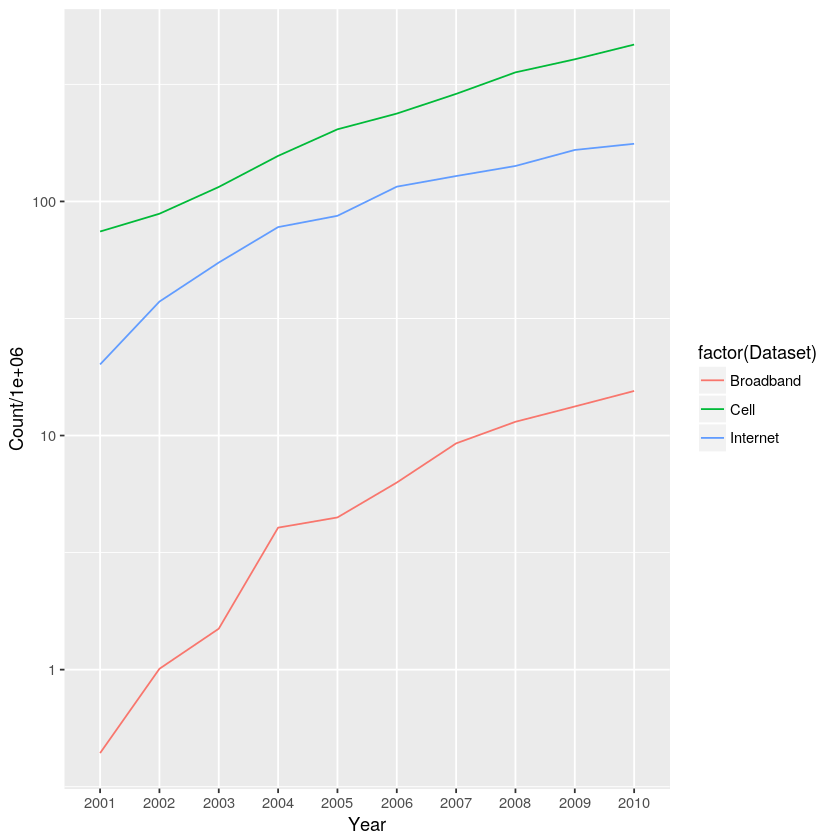

In [278]:
ggplot(df1, aes(Year, Count/1000000, group=factor(Dataset))) + 
    geom_line(aes(color=factor(Dataset))) +
    scale_y_log10()

### Drawing some conclusions...
Some conclusions that can be drawn from the chart above:  
* In general, **broadband access**, **cell phone usage** and **Internet access** have evolved at the same rate around the years, besides in different proportions.  
* Since 2001 the number of cell phones is higher than the total Internet access. It can be justified by the fact that at that time cell  phones were used most for voice service. 
* The number of broadband accesses grew exponentially from 2001 to 2007, a period corresponding to the advent of fixed broadband technology in many considered countries. 

## (2) Internet access by country
To analyze the number of Internet accesses by country we will now consider only the last read dataset, *gm_internet*.

In [216]:
## Working on a new dataframe:
internet <- gm_internet
## Creating a column with the country name:
internet$country <- row.names(internet)
## Showing up the new dataframe:
internet

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,country
Angola,19570,40260,57159,74173,188530,324498,560812,829746,1113307,1908191,Angola
Brazil,8009872,16403934,23989345,35071405,39099569,52963579,58609644,64799077,75791320,79245740,Brazil
Cape Verde,11952,15931,19896,24827,28723,32565,40010,97474,122905,148800,Cape Verde
Equatorial Guinea,888,1781,2977,4977,6988,8005,10027,12054,14508,42024,Equatorial Guinea
Guinea-Bissau,3789,13192,17805,24244,26005,28708,31422,34234,34183,37123,Guinea-Bissau
"Macao, China",99153,113141,118274,148015,167827,228876,239337,255291,286845,308797,"Macao, China"
Mozambique,29912,49846,82737,137563,177450,179473,198483,348393,612611,975395,Mozambique
Portugal,1877401,2018985,3105205,3338887,3689228,4020557,4464922,4455902,4955586,5455217,Portugal
Sao Tome and Principe,9052,11050,15043,20026,21000,21978,22960,24745,26669,31012,Sao Tome and Principe
Timor-Leste,0,0,0,0,1001,1211,1495,1769,2038,2361,Timor-Leste


In this analysis, the TOTAL row would be an outlier and thus must be removed. In R, it can be done when slicing the dataframe with the signal "-" in front of the slice we want to drop out:

In [260]:
## Removing the "Total" row from dataframe
internet <- internet[-11,]

Once again, in order to explore some visualization on this dataframe, we will have to reshape it has we've done in the previous analysis using the *reshape2::melt()* method.

In [263]:
## Reshaping dataframe:
internetT <- reshape2::melt(internet, id.var = "country")
## After reshaping, redefining the columns names:
names(internetT) <- c('country','year','accesses')

In [264]:
head(internetT)

country,year,accesses
Angola,2001,19570
Brazil,2001,8009872
Cape Verde,2001,11952
Equatorial Guinea,2001,888
Guinea-Bissau,2001,3789
"Macao, China",2001,99153


### Visualizing the accesses evolution by country
For this section, we will use as reference the code presented [here](https://ggplot2.tidyverse.org/reference/aes_group_order.html). The y-axis is plot in log10 scale since the order varies from tens to millions.

Warning message:
“Transformation introduced infinite values in continuous y-axis”

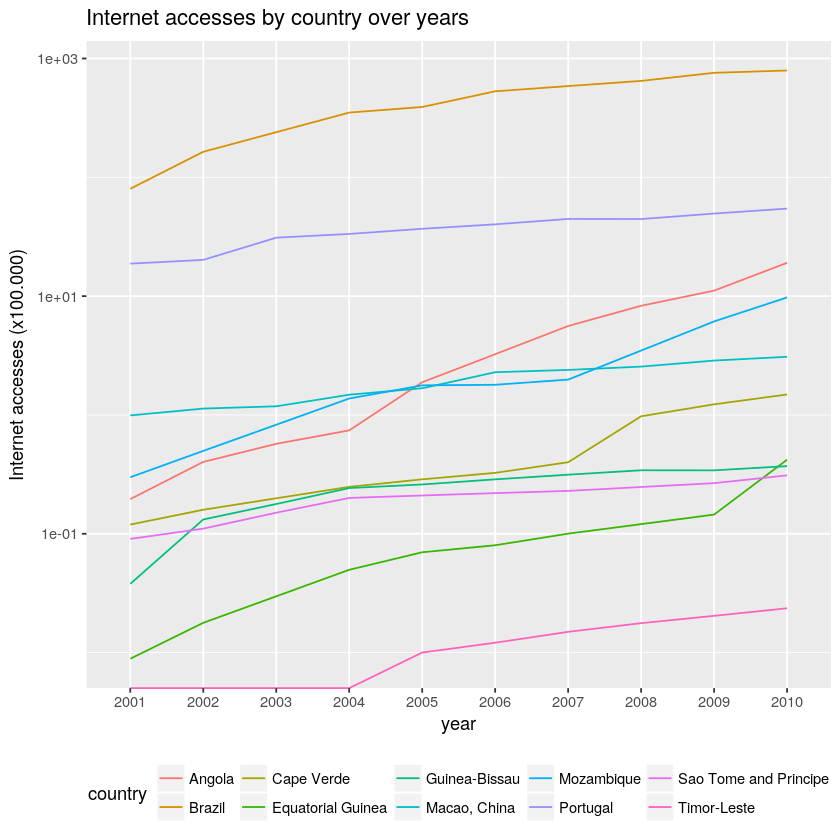

In [267]:
ggplot(internetT, aes(x = year, y = accesses/100000, colour = country)) + 
    geom_line(aes(group = country)) +
    scale_y_log10() +
    theme(legend.position="bottom") +
    ## Setting titles:
    ggtitle("Internet accesses by country over years") +
    ylab("Internet accesses (x100.000)")

From the chart above, it's clear to see that Timor-Leste, for example, did not have any Internet access before 2004 and even after it's nowadays the country with the lowest number of accesses. Brazil, on the other side, was always the country with the highest number of accesses, which is explained by its population. An interesting fact, though, is that Portugal is the second one with the highest number of accesses, besides it's not the second most populate country.  

In this perspective, it's also interesting to notice the slope of the line for each country: those whose slope is smaller may indicate a stabilization in the number of access (the whole population already owns it) or a technological stagnation (the country does not invest in new accesses and the population is neglected).

### Visualizing the accesses evolution by year
For this section, again we will use as reference the code presented [here](https://ggplot2.tidyverse.org/reference/aes_group_order.html). Now, we will not just adjust the y-axis in a log10 scale as before, but we will apply a log10 transformation in the data, in order to reduce what is considered outlier and to provide an insightful result ([a great discussion on why doing this can be found here](https://stats.stackexchange.com/questions/27951/when-are-log-scales-appropriate)). Here it goes:

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

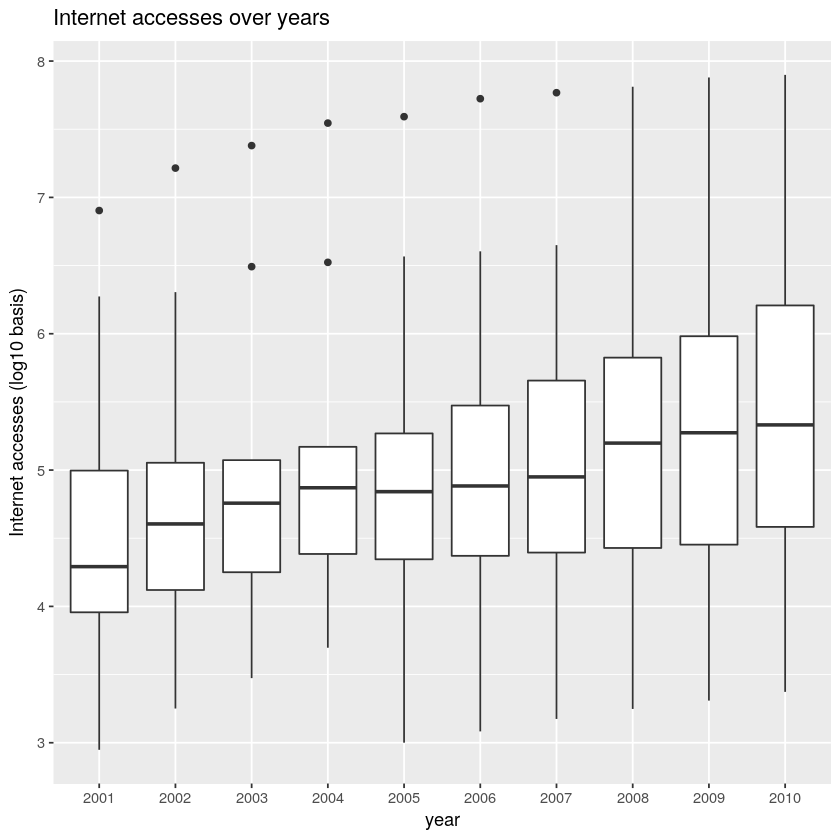

In [272]:
ggplot(internetT, aes(x = year, y = log10(accesses))) +
    geom_boxplot() + 
    ggtitle("Internet accesses over years") +
    ylab("Internet accesses (log10 basis)")

This boxplot brings some interesting interpretations, all complementary to the analysis of the previous chart:  
* The *mean* from 2004 to 2007 were quite similar, indicating some countries did not change its internet accesses number significantly.  
* The larger the box size, the greater the difference of internet accesses among countries, which becomes evident from 2007 onwards.
* The latest observation points to more "digitized" countries.
* What was an outlier in the first years (from the previous chart we can identify it as the number of accesses in Brazil), has become part of the distribution in the more recent years. What this could mean? Again, it may indicate a service stabilization or a technological stagnation, which will require a deeper analysis involving other socio-economic factor for each country.

## Conclusions on R
This section brings some conclusions not about the data itself and its analysis, but how is to perform data analysis on R by those coming from Python.  
* R have clearly more graphics and visualization tools;
* It's easy to build beautiful charts on R by just adding up some layers. This is not so direct in Python;
* It's really simple to manipulate data in R even inside the visualization method;
* On the other hand, Python has a more "coding" approach, which means it's easier to build functions and to automatize. 
* Both languages can be used together by any data scientist, which will develop his/her own intuition to when to use each one.